File Name                                             Modified             Size
fake.csv                                       2019-09-20 02:14:32     56680002


Columns
Fake:
Index(['uuid', 'ord_in_thread', 'author', 'published', 'title', 'text',
       'language', 'crawled', 'site_url', 'country', 'domain_rank',
       'thread_title', 'spam_score', 'main_img_url', 'replies_count',
       'participants_count', 'likes', 'comments', 'shares', 'type'],
      dtype='object')
bs            11492
bias            443
conspiracy      430
hate            246
satire          146
state           121
junksci         102
fake             19
Name: type, dtype: int64


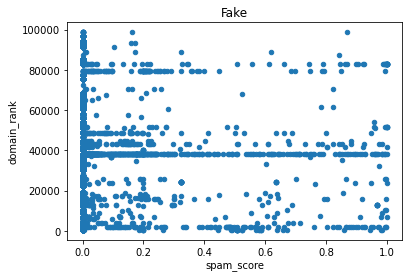

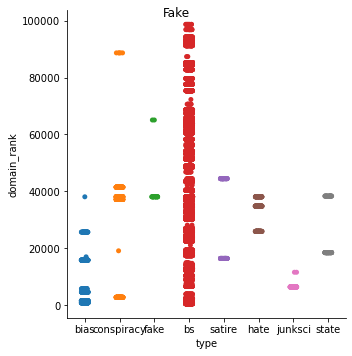

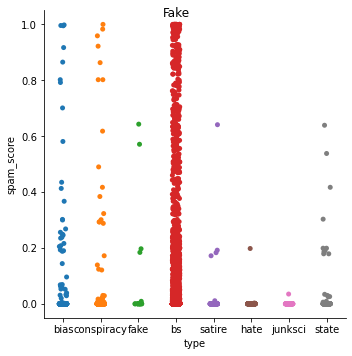

In [2]:
%run 'Load & Clean Fake'.ipynb

In [3]:
fake_df.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,0,0,0,0,0,bias


In [4]:
fake_df = fake_df.drop('uuid', axis=1) \
                .drop('title', axis=1) \
                .drop('text', axis=1) \
                .drop('thread_title', axis=1) \
                .drop('published', axis=1) \
                .drop('crawled', axis=1) \

In [5]:
fake_df.type = fake_df.type.astype('category').cat.codes
fake_df.author = fake_df.author.astype('category').cat.codes
fake_df.language = fake_df.language.astype('category').cat.codes
fake_df.site_url = fake_df.site_url.astype('category').cat.codes
fake_df.country = fake_df.country.astype('category').cat.codes


In [6]:
fake_df.dtypes

ord_in_thread           int64
author                  int16
language                 int8
site_url                int16
country                  int8
domain_rank           float64
spam_score            float64
replies_count           int64
participants_count      int64
likes                   int64
comments                int64
shares                  int64
type                     int8
dtype: object

In [7]:
print(fake_df.shape)

(12999, 13)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(fake_df)

In [9]:
for column in fake_df.columns:
    if 'int' in fake_df[column].dtype.name and '64' not in fake_df[column].dtype.name:
        fake_df[column] = fake_df[column].astype('int64')
    elif 'float' in fake_df[column].dtype.name and '32' not in fake_df[column].dtype.name:
        fake_df[column] = fake_df[column].astype('float32')
        
print(fake_df.dtypes)

ord_in_thread           int64
author                  int64
language                int64
site_url                int64
country                 int64
domain_rank           float32
spam_score            float32
replies_count           int64
participants_count      int64
likes                   int64
comments                int64
shares                  int64
type                    int64
dtype: object


In [10]:
from keras import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import tensorflow as tf
import numpy as np

early_stopping_monitor = EarlyStopping(patience=2)
fake_target = fake_df.pop('type')
fake_dataset = tf.data.Dataset.from_tensor_slices((fake_df.values, fake_target.values)).shuffle(len(fake_df)).batch(13)


In [10]:
fake_NN_1 = Sequential()
fake_NN_1.add(Dense(144, activation='sigmoid'))
fake_NN_1.add(Dense(54, activation='relu'))
fake_NN_1.add(Dense(12, activation='relu'))
fake_NN_1.add(Dense(1, activation='relu'))

fake_NN_1.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
fake_NN_1 = fake_NN_1.fit(fake_dataset, epochs=5, callbacks=[early_stopping_monitor], verbose=True)

Epoch 1/5

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1000/1000 [==============================] - 1s 1ms/step - loss: -370.8534 - accuracy: 0.8821
Epoch 2/5
1000/1000 [==============================] - 1s 1ms/step - loss: -4523.0161 - accuracy: 0.8841
Epoch 3/5
1000/1000 [==============================] - 3s 3ms/step - loss: -16183.5635 - accuracy: 0.8841
Epoch 4/5
1000/1000 [==============================] - 2s 2ms/step - loss: -37593.3594 - accuracy: 0.8841
Epoch 5/5
1000/1000 [==============================] - 1s 1ms/step - loss: -71266.2969 

In [16]:
fake_NN_2 = Sequential()
fake_NN_2.add(Dense(54, activation='sigmoid'))
fake_NN_2.add(Dense(144, activation='sigmoid'))
fake_NN_2.add(Dense(54, activation='sigmoid'))
fake_NN_2.add(Dense(1, activation='relu'))

fake_NN_2.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
fake_NN_2 = fake_NN_2.fit(fake_dataset, epochs=5, callbacks=[early_stopping_monitor], verbose=True)

Epoch 1/5
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6931 - accuracy: 0.0341
Epoch 2/5
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6931 - accuracy: 0.0341
Epoch 3/5
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6931 - accuracy: 0.0341
Epoch 4/5
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6931 - accuracy: 0.0341
Epoch 5/5
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6931 - accuracy: 0.0341


In [24]:
from keras.layers import Dropout

tf.keras.backend.set_floatx('float64')

fake_NN_3 = Sequential()
fake_NN_3.add(Dense(256, activation='sigmoid'))
fake_NN_3.add(Dropout(0.2))
fake_NN_3.add(Dense(128, activation='relu'))
fake_NN_3.add(Dropout(0.2))
fake_NN_3.add(Dense(1, activation='softmax'))

fake_NN_3.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
fake_NN_3.fit(fake_dataset, epochs=20, callbacks=[early_stopping_monitor], verbose=True)

Epoch 1/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1112 - accuracy: 0.8841
Epoch 2/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1112 - accuracy: 0.8841
Epoch 3/20
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1112 - accuracy: 0.8841
Epoch 4/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1112 - accuracy: 0.8841
Epoch 5/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1112 - accuracy: 0.8841
Epoch 6/20
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1112 - accuracy: 0.8841
Epoch 7/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1112 - accuracy: 0.8841
Epoch 8/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1112 - accuracy: 0.8841
Epoch 9/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1112 - accuracy: 0.8841
Epoch 10/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.111

In [43]:
from matplotlib import pyplot as plt

# Create the plot
plt.plot(fake_NN_3.history['loss'], 'g')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

plt.plot(fake_NN_3.history['accuracy'], 'g')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.show()

TypeError: 'History' object is not subscriptable

In [19]:
fake_NN_3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             multiple                  3328      
_________________________________________________________________
dropout_7 (Dropout)          multiple                  0         
_________________________________________________________________
dense_17 (Dense)             multiple                  32896     
_________________________________________________________________
dropout_8 (Dropout)          multiple                  0         
_________________________________________________________________
dense_18 (Dense)             multiple                  129       
Total params: 36,353
Trainable params: 36,353
Non-trainable params: 0
_________________________________________________________________
